# Question 1

A Weiner Process $W(t)$, is continuous process where initially $W(0) = 0$ and increments are independent and normally distributed with mean 0 and variance equal to the time difference.

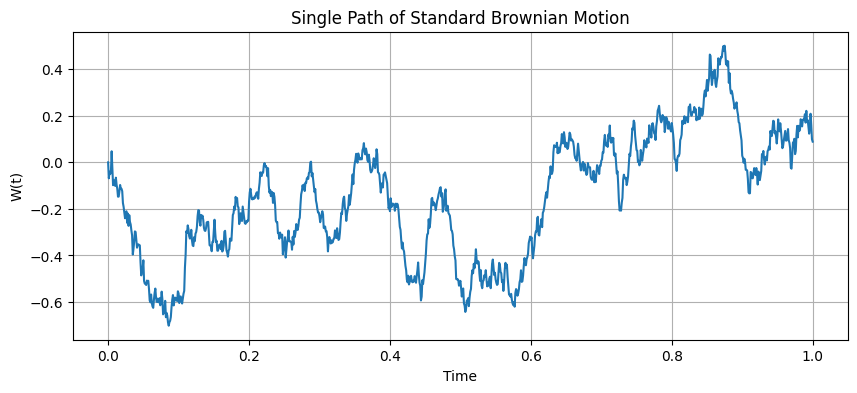

(array([0.   , 0.001, 0.002, ..., 0.998, 0.999, 1.   ]),
 array([ 0.        , -0.06868421, -0.04029578, ...,  0.15931261,
         0.0989819 ,  0.08898854]))

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_wiener_path(T=1.0, N=1000):
    #defining time interval size
    dt = T / N
    t = np.linspace(0, T, N+1)
    #selecting increments which are normally distributed with mean 0 and variance
    #equal to the time interval
    dW = np.random.normal(0, np.sqrt(dt), size=N)
    # intial condition set to 0
    W = np.zeros(N+1)
    #cumulatize sum to get current W
    W[1:] = np.cumsum(dW)


    plt.figure(figsize=(10, 4))
    plt.plot(t, W)
    plt.title("Single Path of Standard Brownian Motion")
    plt.xlabel("Time")
    plt.ylabel("W(t)")
    plt.grid(True)
    plt.show()

    return t, W

simulate_wiener_path()

# Question 2

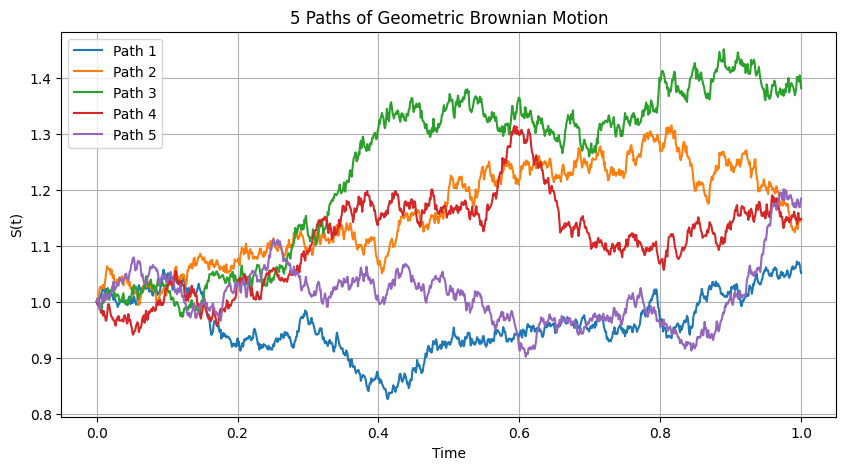

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# S0 is the starting price
# alpha is the Average growth rate
# sigma is volatility (randomness level)
# N is the number of time steps
# T is the total time
# M is the number of paths which is 5 here
def simulate_gbm_paths(S0=1.0, alpha=0.1, sigma=0.2, T=1.0, N=1000, M=5):

    dt = T / N
    t = np.linspace(0, T, N + 1)
    # 2D array to store all M paths
    paths = np.zeros((M, N + 1))

    for i in range(M):
        #selecting increments which are normally distributed with mean 0 and variance
        #equal to the time interval
        dW = np.random.normal(0, np.sqrt(dt), size=N)
        # intial condition set to 0
        W = np.zeros(N+1)
        #cumulatize sum to get current W
        W[1:] = np.cumsum(dW)
        #exponent part of GBM formula
        exponent = sigma * W + (alpha - 0.5 * sigma**2) * t
        # GBM formula
        paths[i] = S0 * np.exp(exponent)

    # Plot all paths
    plt.figure(figsize=(10, 5))
    for i in range(M):
        plt.plot(t, paths[i], label=f"Path {i+1}")
    plt.title("5 Paths of Geometric Brownian Motion")
    plt.xlabel("Time")
    plt.ylabel("S(t)")
    plt.grid(True)
    plt.legend()
    plt.show()

# Run the simulation
simulate_gbm_paths()


# Question 3

Let's assume s ≤ t <br>
Rewrite W<sub>t</sub> = W<sub>s</sub> + (W<sub>t</sub> - W<sub>s</sub>) <br>
W<sub>s</sub> and (W<sub>t</sub> - W<sub>s</sub>) are independent <br>
(W<sub>t</sub> - W<sub>s</sub>) has mean 0, so expectation of product = product of expectations = 0 <br>

So: <br>
E\[W<sub>s</sub>W<sub>t</sub>\] = E\[W<sub>s</sub>W<sub>s</sub>\] + E\[W<sub>s</sub>(W<sub>t</sub> - W<sub>s</sub>)\] <br>
E\[W<sub>s</sub>W<sub>s</sub>\] = Var(W<sub>s</sub>) = s <br>
E\[W<sub>s</sub>(W<sub>t</sub> - W<sub>s</sub>)\] = 0 <br>
So, E\[W<sub>s</sub>W<sub>t</sub>\] = s + 0 = s <br>
Similar argument for t < s,
so, E\[W<sub>s</sub>W<sub>t</sub>\] = min(s,t)

In [8]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

total_time = 1.0

# Divide the time into small intervals
num_steps = 1000
time_step = total_time / num_steps

# Number of times to simulate the Brownian motion paths
numsim = 10000

# array of timepoints
tps = np.linspace(0, total_time, num_steps + 1)

# choosing two time points s and t
s = 0.2
t = 0.9

# index of the time points s and t in the timepoint array
s_index = int(s * num_steps)
t_index = int(t * num_steps)


# incremental changes in Brownian motion for all time paths choosen at random from normal distribution
# with mean 0 and standard deviation sqrt(time_step)
w_delta = np.random.normal(0, np.sqrt(time_step), size=(numsim, num_steps))

# add up W_delta to get the Brownian paths
paths = np.cumsum(w_delta, axis=1)

# Insert a column of zeros at the beginning to represent W(0) = 0
paths = np.hstack((np.zeros((numsim, 1)), paths))

# Extract the values of W(s) and W(t) from all the paths
W_s = paths[:, s_index]
W_t = paths[:, t_index]

# using Monte Carlo averaging
simulated_expectation = np.mean(W_s * W_t)

theoretical_value = min(s, t)


print("Estimated E[W_s * W_t]:", round(simulated_expectation, 4))
print("Theoretical value (min(s, t)):", round(theoretical_value, 4))



Estimated E[W_s * W_t]: 0.2012
Theoretical value (min(s, t)): 0.2


# Question 4

Mean of W(t) - W(s): -0.0010508007522169102
theoretical mean of W(t) - W(s): 0
Variance of W(t) - W(s): 0.5884042681014844
theoretical variance of W(t) - W(s): 0.6000000000000001


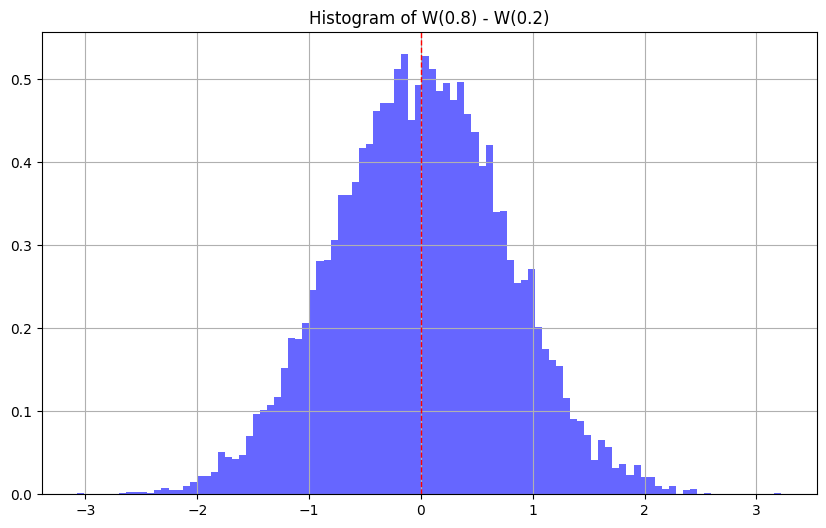

In [9]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(2)
# Parameters
T = 1.0
numsteps = 1000
numsims = 10000
dt = T / numsteps
# time points array
tps = np.linspace(0, T, numsteps + 1)

# take s <= t
s = 0.2
t = 0.8
s_idx = int(s * numsteps)
t_idx = int(t * numsteps)

# simulate brownian motion for numsims paths

dW = np.random.normal(0, np.sqrt(dt), size=(numsims, numsteps))
W = np.cumsum(dW, axis=1)
W = np.hstack((np.zeros((numsims, 1)), W))

# Extract W_s and W_t
W_s = W[:, s_idx]
W_t = W[:, t_idx]

# Increments
increment = W_t - W_s


print("Mean of W(t) - W(s):", np.mean(increment))
print("theoretical mean of W(t) - W(s):", 0)
print("Variance of W(t) - W(s):", np.var(increment))
print("theoretical variance of W(t) - W(s):", t - s)

# Plot histogram of increments
plt.figure(figsize=(10, 6))
plt.hist(increment, bins=100, density=True, alpha=0.6, color='blue') # making density true for probability density function
plt.axvline(np.mean(increment), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.title(f"Histogram of W({t}) - W({s})")
plt.grid(True)
plt.show()


# Question 5

In [1]:
import numpy as np


T = 1.0
numsteps = 1000
dt = T / numsteps
numpaths = 10000
tps = np.linspace(0, T, numsteps + 1)

# choose s < t
s = 0.5
t = 0.8
s_idx = int(s * numsteps)
t_idx = int(t * numsteps)

# generate numpaths paths of brownian motion
dW = np.random.normal(0, np.sqrt(dt), size=(numpaths, numsteps))
W = np.cumsum(dW, axis=1)
W = np.hstack((np.zeros((numpaths, 1)), W))


W_s = W[:, s_idx]
W_t = W[:, t_idx]

# Since W_t - W_s is independent of W_s and has mean 0:
# E[W_t | W_s] ≈ W_s
expected = np.mean(W_t - W_s)

print(f"Average of (W_t - W_s): {expected:.4f}")
print("Expected value of (W_t - W_s) is 0")

#since E[W_t - W_s] = 0,
# E[W_t | W_s] = E[W_s + W_t - W_s | W_s] = E[W_s | W_s] + E[W_t - W_s | W_s]
# E[W_s | W_s] = W_s
# E[W_t - W_s | W_s] = 0
# Therefore, E[W_t | W_s] = W_s
# therefore, Brownian motion has finite expectation, this satisfies the definition of a martingale.

Average of (W_t - W_s): 0.0050
Expected value of (W_t - W_s) is 0
